# Nightlife in Las Vegas

#### Junxia Zhu, Yiqun Jiang, Yingjing Jiang

## 1. Introduction

In this project, we analyse yelp data focusing on nightlife and bars in Las Vegas. We aim to explore which factors influence ratings of reviews and furthermore, give advice to owners for improving the ratings. Our work can be mainly divided into two parts: feature extraction from attributes and key words analysis from reviews. For the first part, we apply random forest algorithm and use ANOVA. For the latter, we use Python to do nature language provessing finding meaningful key words. We interpret the factors and make suggesstions due to outcomes. Besides, we also construct prediction models to achieve a "bonus" goal for predicting ratings.

## 2. Background

The Yelp data includes 4 json files: review_train.json, review_test.json, business_train.json, business_test.json, which contains 5364626 reviews, 1321274 reviews, 154606 businesses and 38000 businesses respectively.

## 3. Goal1--Analysis

### 3.1 Data Filtering 

For the analysis part, we focus on the two train data files which has 5364626 reviews for 154606 business. To fit our thesis, we filter data by "bars", "nightlife" in categories and "Las Vagas" in city, and the total data involved in this part includes about 265847 reviews for 1201 businesses.

### 3.2 Business Analysis

#### 3.2.1 Data Cleaning

1. There are nested dictionaries in business attributes, so we first extract all dictionaries as a new attribute list.   
2. Then we calculate average star of all reviews for each business and set the average stars as our response variable.   
3. One point needs to be metioned is that many attributes have missing values so we mark the blank with "unknown", which is treated as a new level.  

#### 3.2.2 Important Attributes Analysis

Here we use random forest computing variable importance scores to select useful attributes. "NoiseLevel" and "RestaurantPriceRange" are of the top importance, which means these two attributes are highly related to ratings. 

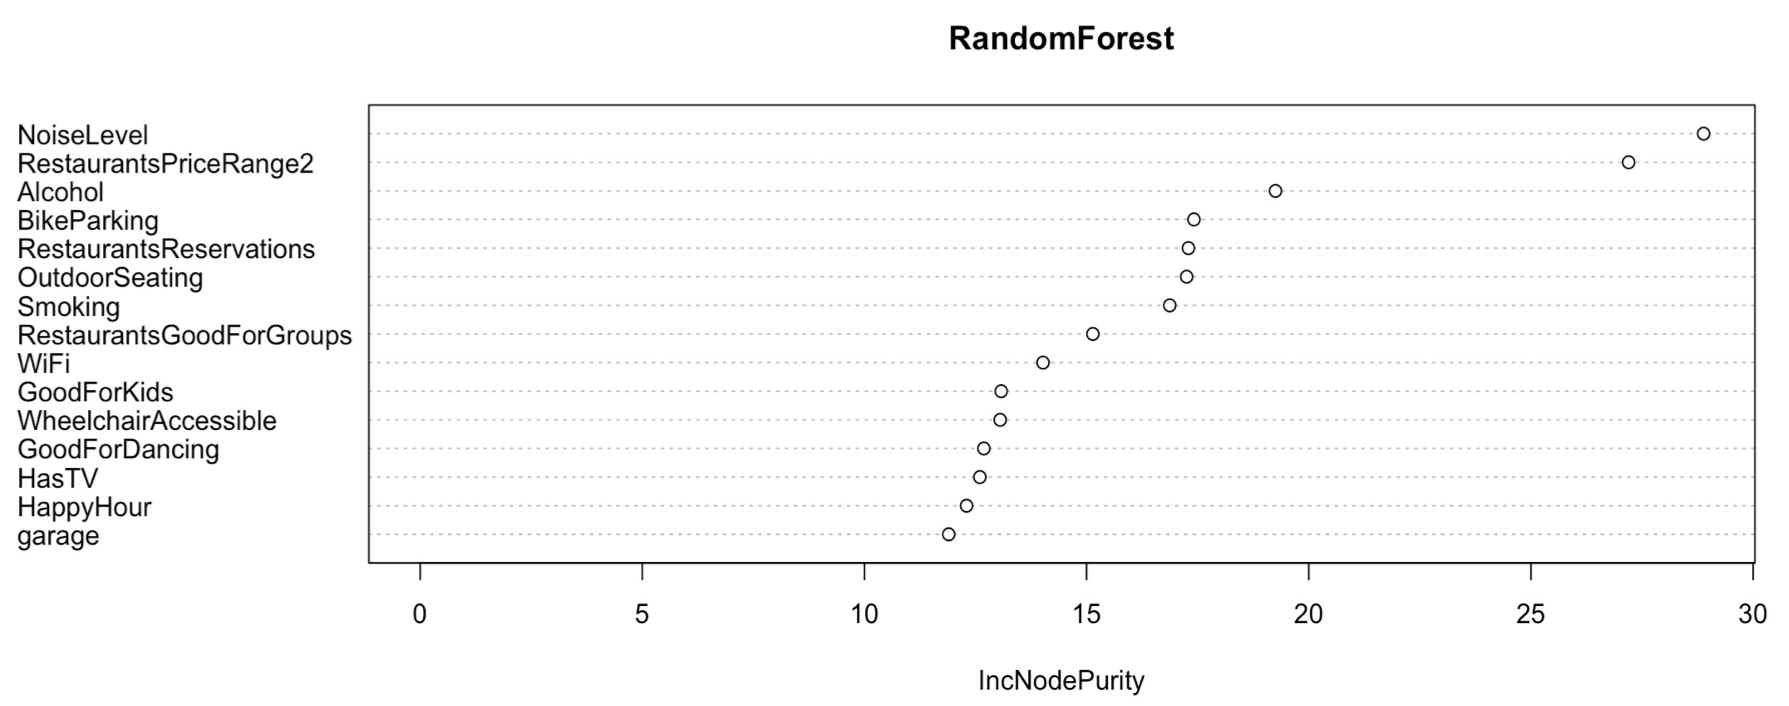

In [2]:
from IPython.display import display, Image
display(Image(filename='rf.png'))

Next we do one-way ANOVA for both attributes, the model and outcomes are as below:

|Terms | P-value | Result |
|:---------:| :-------------------------: |:----------:|
| NoiseLevel |  4.36*10e-8  | reject $H_0$ |
| RestaurantPriceRange |  2.44*10e-3  | reject $H_0$ |
 
According to the results, we reject $H_0$--there is no differences between different levels of attributes, which means there does exist discrepancy between different levels of NoiseLevel and RestaurantPriceRange.

We also want to check interaction between these two attributes, so we construct full model with interaction term. The outcome is shown as below:


|  Terms | P-value |
|:---------:| :-------------------------: |
|NoiseLevel |  3.02*e-8 | 
|RestaurantPriceRange  |  3.50*e-3  |
|NoiseLevel*RestaurantPriceRange |  3.58*e-2  |

From the table above, we know that all terms in the full model are significant, so except for NoiseLevel and RestaurantPriceRange, their interaction also relates to ratings. Besides, we compare full model with all reduced models and find it had the lowest RSS, which means it is the best model. This result also testified that the outcome of two-way ANOVA is reliable.

#### 3.2.3 Missing Value Analysis 

In data cleaning part, we change all the missing values to "unknown", which is treated as a new level. We also want to explore the effect of this level, so we apply decision tree method using GUIDE$^{[1]}$-a software for machine learning. The tree plot and corresponding explaination are shown as below.

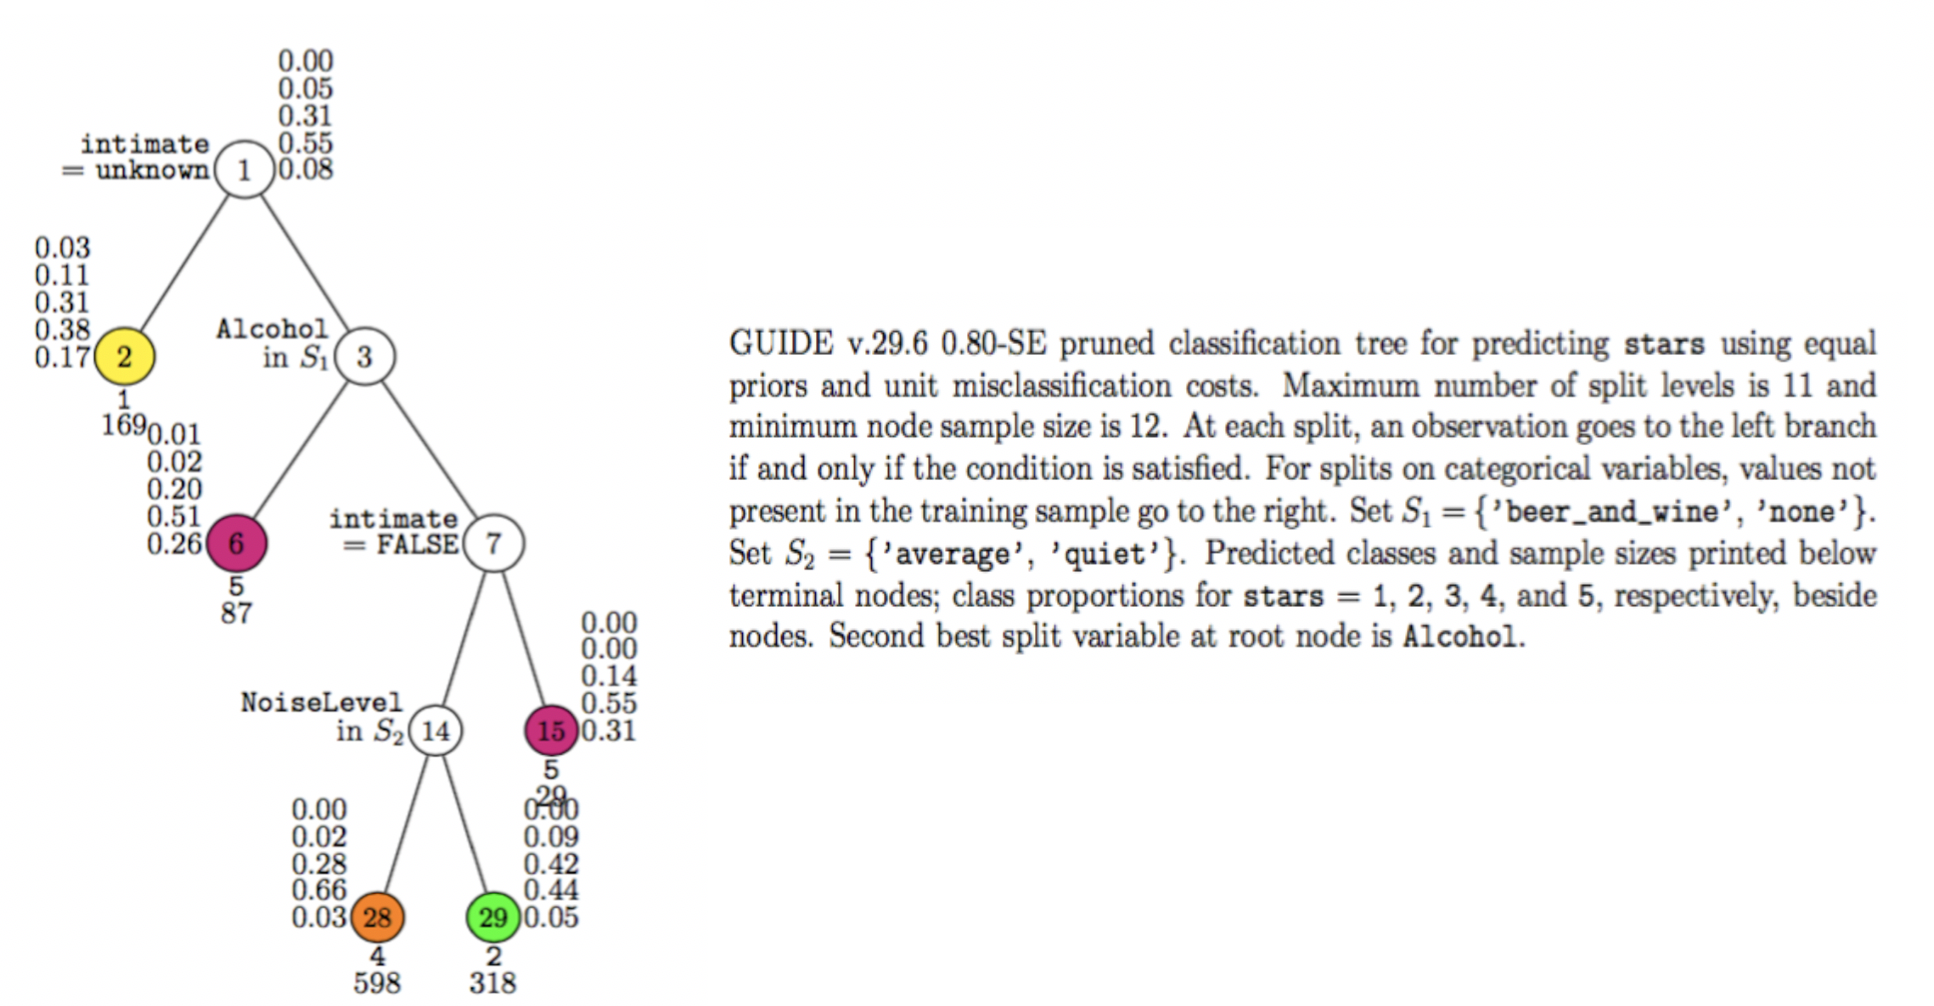

In [3]:
display(Image(filename='tree_2.png'))

The plot gives us insights about how missing value relates to ratings. According to node 1, We find missing value of intimate would somehow lead to low ratings. For alcohol, if it is "beer_and_wine" or "none", it tends to have high stars, and when it is "full_bars" or just NA, its ratings would depend more on NoiseLevel. When noise level is low, like "average" and "quiet", bars are likely to get high stars but when this attribute is missing or loud, they may get low stars.

### 3.3 Review Analysis

#### 3.3.1 Data Cleaning

1. Tokenize each reviews, which means break paragraphs to sentences.
2. To deal with negative tone in reviews, we check each sentences. We transform those "n't" to "not" and then add "NOT_" to each word after words like "not" and "never" in those sentences. By the way in some .py scripts and .ipynb we use "addnot" instead of "NOT_" because some functions are not able to handle "_" punctuation.(Mainly in prediction part because of function "CountVectorizer()")
3. As what we care about is text, so we remove punctuations and meaningless symbols. 
4. For each word, we do stemming which could avoid different word forms caused by tense, singular and plural. Then we are able to break each reviews to words and count frequency.
5. In the word lists, some words like "is", "the" actually make no sense so we construct a stopword list to remove all these useless word.

#### 3.3.2 Key Word Analysis

We first divide words into four aspects: food, beverage, entertainment and service, and then choose high-rate words from these four aspects respectively. Here, to deviod baseline differences' influence of star distributions, we divide word frequency by the number of words in reviews of each star level, which changes the frequency to rates. To be more specific for our word analysis, we pick words exclusive to bars like "beer", "cocktail", "strip", "casino", and plot histograms of each stars to see if there exists special patterns. 
 

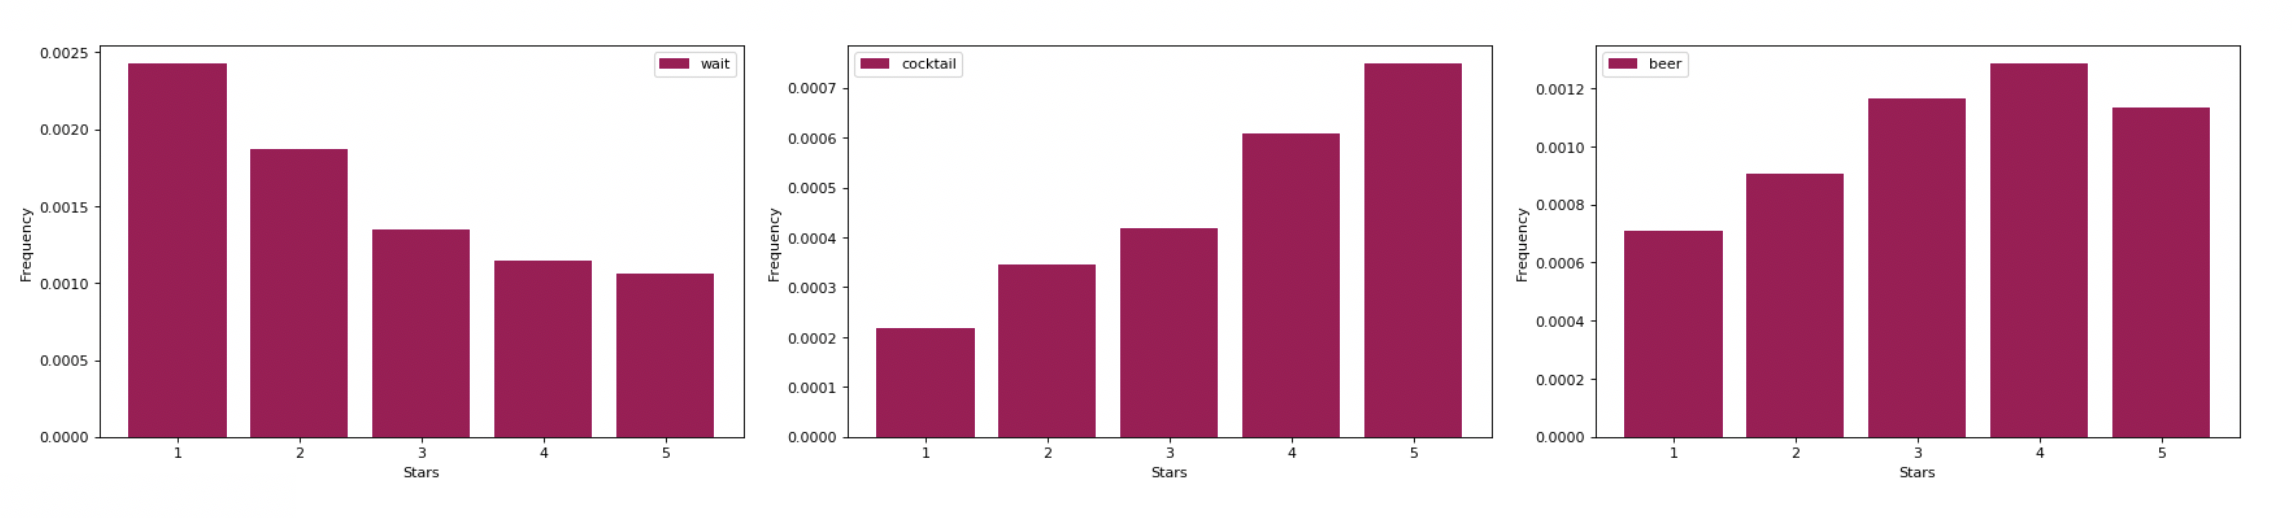

In [4]:
display(Image(filename='wait_cocktail_beer.png'))

When we try to interpret the histograms, we find the word like "wait" and "cocktail" are highly positive or negtive related to ratings while the pattern for the word "beer" is really hard to explain since the rates of each star level do not show a strong trend with ratings. So upon previous unigram analysis, we develop bigrams to reach deeper exploration for beers. We find "beer selection", "draft beer" and "craft beer" are of top rates. 

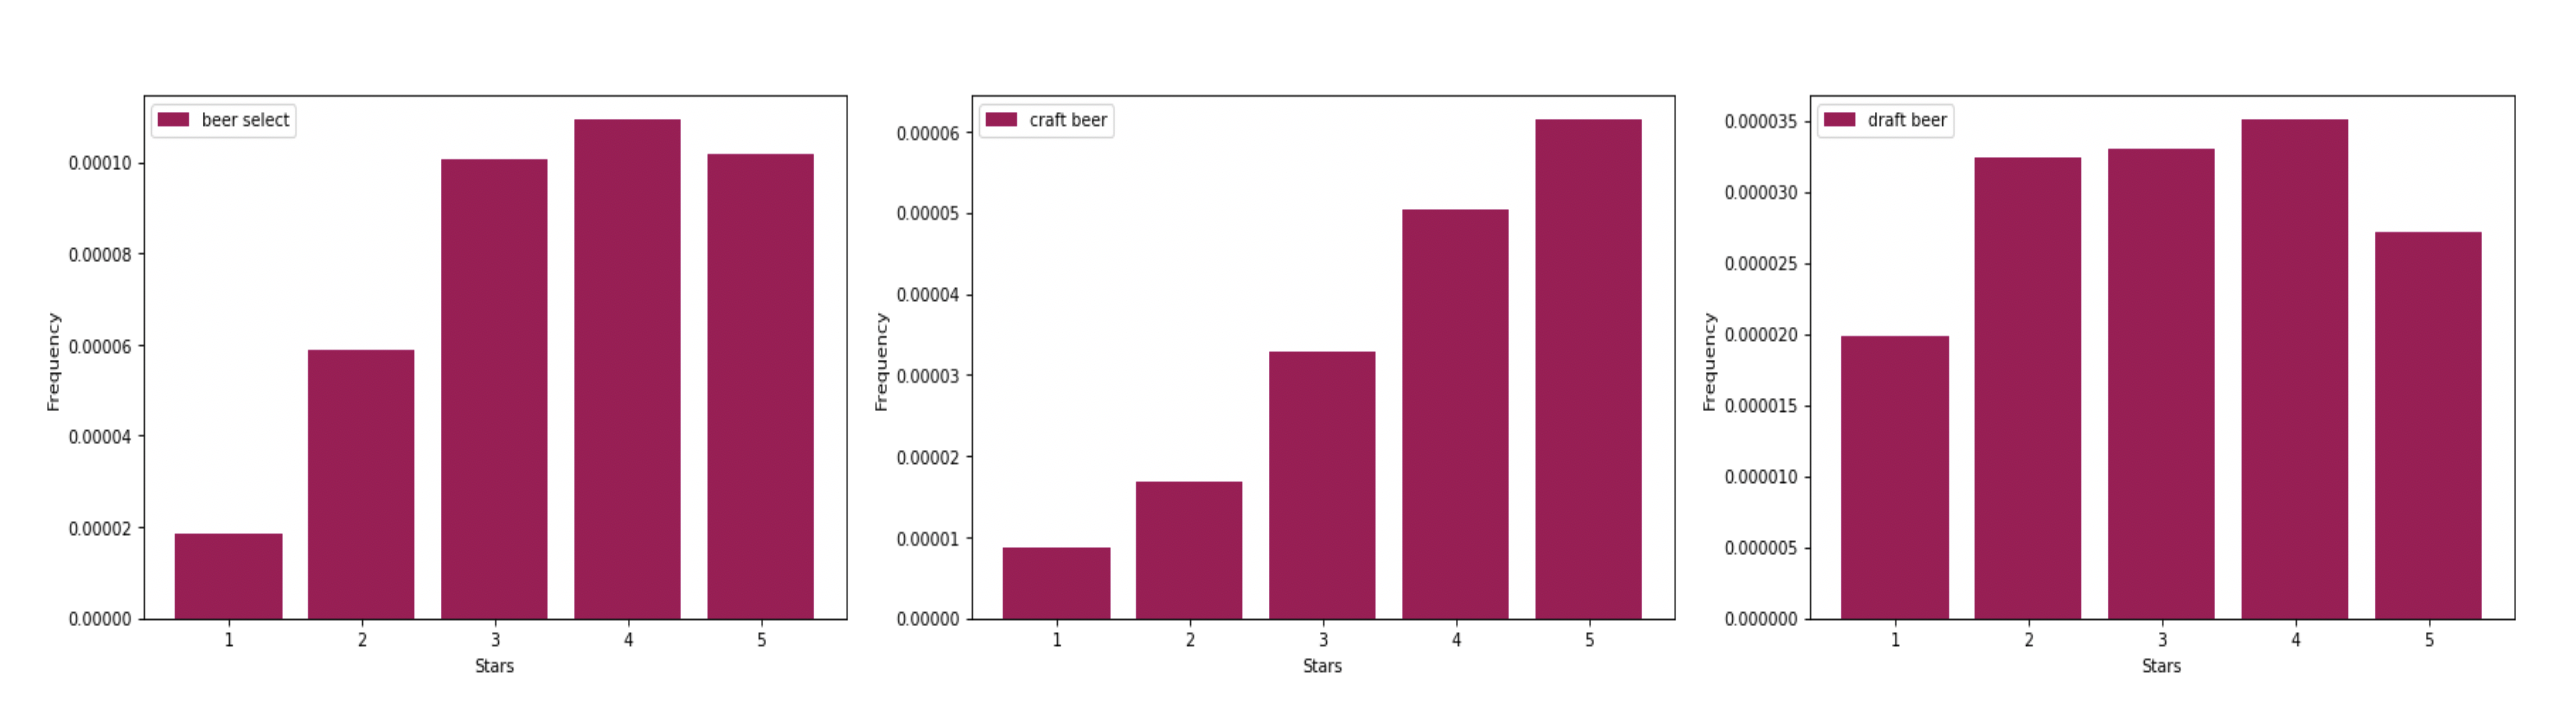

In [5]:
display(Image(filename='beer_3.png'))

We plot the bigram frequency of each star level trying to find meaningful pattern, which are shown as above. It is clear that "craft beer" appears more frequently with higher star level, which fits our expectation since craft beer is generally more tasty than draft beer. But for "draft beer" and "beer select", there are not such clear pattern so we search for the adjective next to these bigrams to get more information to assist our analysis. And with analysis for the adjectives, we are able to give corresponding advice.   

To attract adjective near specific terms, we use pos_tag(part-of-speech tagging) in NLTK to obtain adjective near "beer", "draft beer", "beer select" and "craft beer". Here we only focus on general type of adjective instead of comparative and superlative. Then we manully classify them as "positive" or "negative" and drop those neutral adjective. The reason why we do this is because we don't want to waste time matching words with a large adjective dictionary where most of them don't appear in our review data. And we want to make sure every adjective near specific term is in our pos/neg corpus so that it will be counted. Because of our strict requirement(we search two words before term and two words after term and regard word as an adjective if it is in our pos/neg corpus) so we actually don't have very high occurance of adjective. Below is an example output for "beer" in star level 1:  
    <center>top5 positive adj near 'beer' is ['great', 'good', 'warm', 'special', 'free']  
    <center>top5 negative adj near 'beer' is ['cold', 'small', 'flat', 'damn', 'poor']     
    <center>count of positive adj near 'beer' is 313   
    <center>count of negative adj near 'beer' is 132  </center>    
        
      
We also extract adjective based on every business id to give corresponding advice. 
To make our conclusions easily understandable, we made a shiny app to visualize our results. Here is the link for the shiny app: https://yingjingjiang.shinyapps.io/shiny_app/    

## 4. Goal2--Prediction

We combine features extracted from both reviews and attributes. We make dataframe with columns of key words and attibutes and then construct several models to predict. For reviews, we apply TF-IDF algorithm to get frequency matrix and then combine the attributes columns to get our final data frame. After that, we try logistic regression and several machine learning methods to predict ratings. Our best prediction gives RMSE 0.825.

## 5. Conclusions and Our Advice

### Conclusion: 
We find NoiseLevel, RestaurantPriceRange and their interaction are highly related to ratings in all attributes. Besides, missing value of Intimate is important and missing value of Alcohol and NoiseLevel also makes differences. For reviews, key words that can be used to improve bars' ratings are food-"salt", service-"wait" and "crowd", beverage-"beer" and "cocktail", entertainment-"casino" and "strip". And after deeper exploration of single grams and bigrams, we are able to give advice from different aspects. Such as compared with industry average, business owners should improve which item according to the percentage of positive adjective.

### Advice: 
1. Noise Level really influences bars' rating a lot, we understand that when people are high, they tend to make loud noises but if bars could make some control of that, it would be awesome.  
2. If possible, bars could allocate some space for customers with demand for intimate.  
3. For food, we recommend chef to ask customers when ordering about flavour to adjust salty level.  
4. For service, it is better for bars to control attendences since crowded environment would give customers bad experience. And make sure waiters are well-trained and be nice to customers.  
5. For entertainments, provide casino or strip could somehow help improve customers' satisfactory.  
6. For beverage, which may be the most important part for bars, we would suggest that if possible, provide some craft beers but not only draft beer. And provide wider selection of beers.  

## 6. Strength and Weakness

### Strength:
1. Consider missing value as a level to see whether it makes differences but not simply omit them.
2. Use several methods to confirm our results, which makes our conclusion robust.
3. Carefully deal with the reviews and take care of different baselines.
4. Adjective corpus is obtained manually from review data itself, which is suitable for our analysis.

### Weakness:
1. Fail to find patterns in time and hour analysis, which may need more careful inspectation.
2. Hard to interpret tree method outcome objectively more out of subjective analysis.
3. Due to time limit, we just include several bigrams to give advice.

### Contribution: 

#### 1. Goal1:   
* Business Analysis:   
    Data cleaning: Junxia Zhu, Yiqun Jiang, Yingjing Jiang  
    Model: Yiqun Jiang, Yingjing Jiang  
    Plots: Junxia Zhu  
* Word Analysis:   
    Data cleaning: Yiqun Jiang, Junxia Zhu  
    Ngrams generating: Yiqun Jiang  
    Adj analysis: Junxia Zhu  
    Plots: Junxia Zhu  
    Shiny app: Yingjing Jiang  
    
#### 2. Goal2:  
* Kaggle: Junxia Zhu, Yiqun Jiang, Yingjing Jiang  

### Reference
[1] GUIDE Manual:http://www.stat.wisc.edu/~loh/treeprogs/guide/guideman.pdf